In [0]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPooling2D
from pathlib import Path

## Loading the datasets

In [0]:
(X_train, y_train), (X_test, y_test ) = cifar10.load_data()


## Preprocessing the Data

In [0]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train = X_train/255
X_test = X_test/255

## Converting our labels from 0-9 to the array of the binary label with index to 1 whici is label and all other to zero
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


## Creatting the model

In [68]:
model = tf.keras.Sequential([
	tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
	tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
	tf.keras.layers.MaxPooling2D(2, 2),
	tf.keras.layers.Dropout(0.25),
	tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
	tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
	tf.keras.layers.MaxPooling2D(2, 2),
	tf.keras.layers.Dropout(0.25),
	tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
	tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
	tf.keras.layers.MaxPooling2D(2, 2),
	tf.keras.layers.Dropout(0.25),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
	tf.keras.layers.Dropout(0.5),
	tf.keras.layers.Dense(10, activation='softmax'),
               
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 64)         

## Compiling the Neural Network 

In [0]:
from tensorflow.keras.optimizers import SGD

opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics = ['accuracy']
              )

## Training the model

In [70]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 200,
    validation_data = (X_test, y_test),
    shuffle = True
)

Epoch 1/200
782/782 [==============================] - 6s 8ms/step - loss: 2.2099 - accuracy: 0.1605 - val_loss: 1.9932 - val_accuracy: 0.2819
Epoch 2/200
782/782 [==============================] - 6s 8ms/step - loss: 1.8946 - accuracy: 0.2873 - val_loss: 1.7040 - val_accuracy: 0.3820
Epoch 3/200
782/782 [==============================] - 6s 8ms/step - loss: 1.7367 - accuracy: 0.3479 - val_loss: 1.6005 - val_accuracy: 0.4112
Epoch 4/200
782/782 [==============================] - 6s 8ms/step - loss: 1.6334 - accuracy: 0.3915 - val_loss: 1.4820 - val_accuracy: 0.4586
Epoch 5/200
782/782 [==============================] - 6s 8ms/step - loss: 1.5542 - accuracy: 0.4241 - val_loss: 1.4518 - val_accuracy: 0.4697
Epoch 6/200
782/782 [==============================] - 6s 8ms/step - loss: 1.4873 - accuracy: 0.4509 - val_loss: 1.3443 - val_accuracy: 0.5117
Epoch 7/200
782/782 [==============================] - 6s 8ms/step - loss: 1.4390 - accuracy: 0.4746 - val_loss: 1.3295 - val_accuracy: 0.5182

## Making prediction on the data


In [85]:
from keras.preprocessing import image
import numpy as np

class_labels = [
                "plane",
                "car",
                "bird",
                "cat",
                "deer",
                "dog",
                "frog",
                "horse",
                "boat",
                "truck"
]

img = image.load_img("/content/drive/My Drive/linkdin-notebook/cat.png", target_size=(32, 32))

image_test = image.img_to_array(img)

list_image = np.expand_dims(image_test, axis = 0)

#list_image = list_image.astype("float32")
results = model.predict(list_image)

single_result = results[0]

most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]

class_label = class_labels[most_likely_class_index]

print("This is image is a {} - Likelihood: {:2f}".format(class_label, class_likelihood))

This is image is a cat - Likelihood: 1.000000


In [83]:
single_result

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

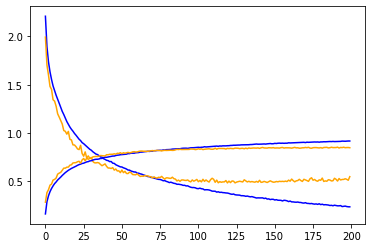

In [84]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color = 'blue', label = "train")
plt.plot(history.history['val_loss'], color = "orange", label = 'test')


plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

## Using the vgg16 model to predict the data

In [60]:
## Using the pretrained model for image recognition
import numpy as np
from keras.preprocessing import image
from keras.applications import vgg16

#load keras vgg16 model that was pretrained against the imageNet database
model = vgg16.VGG16()

# load the image file , resizing it to 224*224
img = image.load_img("/content/drive/My Drive/linkdin-notebook/animal-pet-cute-kitten-45201.jpg", target_size = (224,224))

# convert the image to a numpy array
x = image.img_to_array(img)

# Add a fourth dimensions( since keras expect the list of images)
x = np.expand_dims(x, axis=0)

#Normalize the imput pixel value to the range used when training the neural network
x = vgg16.preprocess_input(x)

# Run the image through the deep neural network to make the prediction
predictions = model.predict(x)

# Look the the names of predicted classes index zero is the result for the first prediction
predicted_classes = vgg16.decode_predictions(predictions, top=9)

for imagenet_id, name, liklihood in predicted_classes[0]:
  print("predictions: {} - {:2f}".format(name, liklihood))

predictions: Egyptian_cat - 0.388283
predictions: tabby - 0.287608
predictions: lynx - 0.109123
predictions: Persian_cat - 0.079098
predictions: tiger_cat - 0.061431
predictions: laptop - 0.007686
predictions: computer_keyboard - 0.005566
predictions: doormat - 0.005422
predictions: notebook - 0.004927
